# Introduction

Refining my data analytics involving statistics

In [1]:
import numpy as np
import scipy
import matplotlib
import pandas as pd
import statsmodels
import pymc as pm
import matplotlib.pyplot as pp
from IPython import display
from ipywidgets import interact, widgets
import re
import mailbox
import csv
%matplotlib inline

In [3]:
#pandas reader to read csv file, get only selected columns
planets = pd.read_csv('py-statistics-refine\\Exercise Files\\chapter2\\02_02\\02_02Planets.csv')
                      #usecols=[0,1,2,3])

In [23]:
#show dataframe df['col_name'] or dot notation df.col_name
planets

,Planet,Mass,Diameter,DayLength
0,MERCURY,0.3300,4879,4222.6
1,VENUS,4.8700,"12,104",2802.0
2,EARTH,5.9700,"12,756",24.0
3,MOON,0.0730,3475,708.7
4,MARS,0.6420,6792,24.7
5,JUPITER,1898.0000,"142,984",9.9
6,SATURN,568.0000,"120,536",10.7
7,URANUS,86.8000,"51,118",17.2
8,NEPTUNE,102.0000,"49,528",16.1
9,PLUTO,0.0146,2370,153.3


In [41]:
#get a row df.loc[index] or rows with slicer :
planets.loc[0]
planets.loc[2:4]

,Planet,Mass,Diameter,DayLength
2,EARTH,5.970,"12,756",24.0
3,MOON,0.073,3475,708.7
4,MARS,0.642,6792,24.7


In [58]:
#set this column df.set_index('column_name') as the index
#inplace means, overwrite on itself, no need to assign the same variable to the leftmost
planets.set_index('Planet', inplace=True)

In [47]:
planets.loc['MERCURY']

Mass           0.33
Diameter       4879
DayLength    4222.6
Name: MERCURY, dtype: object

In [28]:
planets.info()
len(planets)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Planet     10 non-null     object 
 1   Mass       10 non-null     float64
 2   Diameter   10 non-null     object 
 3   DayLength  10 non-null     float64
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes


10

In [59]:
#get a specific observation, 3 different approaches
planets.FirstVisited['MERCURY'], planets.loc['MERCURY'].FirstVisited, planets.loc['MERCURY', 'FirstVisited']

('1974-03-29', '1974-03-29', '1974-03-29')

In [61]:
#get data type
type(planets.loc['MERCURY', 'FirstVisited'])
#convert using pandas
planets.FirstVisited = pd.to_datetime(planets.FirstVisited)


In [62]:
#checking. now it is in date time format, allows for more date functions
planets.FirstVisited

Planet
MERCURY   1974-03-29
VENUS     1962-08-27
EARTH            NaT
MOON      1959-09-12
MARS      1965-07-15
JUPITER   1973-12-04
SATURN    1979-09-01
URANUS    1986-01-24
NEPTUNE   1989-08-25
PLUTO     2015-07-14
Name: FirstVisited, dtype: datetime64[ns]

In [63]:
#get the year using dt.year function for date time data types
planets.FirstVisited.dt.year

Planet
MERCURY    1974.0
VENUS      1962.0
EARTH         NaN
MOON       1959.0
MARS       1965.0
JUPITER    1973.0
SATURN     1979.0
URANUS     1986.0
NEPTUNE    1989.0
PLUTO      2015.0
Name: FirstVisited, dtype: float64

In [65]:
#some basic calculation
2023 - planets.FirstVisited.dt.year

Planet
MERCURY    49.0
VENUS      61.0
EARTH       NaN
MOON       64.0
MARS       58.0
JUPITER    50.0
SATURN     44.0
URANUS     37.0
NEPTUNE    34.0
PLUTO       8.0
Name: FirstVisited, dtype: float64

In [5]:
#get column df['column_name'] or dot notation df.column_name
planets['Mass'], planets.Mass

(0       0.3300
 1       4.8700
 2       5.9700
 3       0.0730
 4       0.6420
 5    1898.0000
 6     568.0000
 7      86.8000
 8     102.0000
 9       0.0146
 Name: Mass, dtype: float64,
 0       0.3300
 1       4.8700
 2       5.9700
 3       0.0730
 4       0.6420
 5    1898.0000
 6     568.0000
 7      86.8000
 8     102.0000
 9       0.0146
 Name: Mass, dtype: float64)

In [10]:
#loading new dataset, using encoding
billboard = pd.read_csv('py-statistics-refine\\Exercise Files\\chapter2\\02_04\\billboard.csv', encoding = 'latin-1')

In [15]:
billboard.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#check column names
billboard.columns

Index(['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered',
       'date.peaked', 'x1st.week', 'x2nd.week', 'x3rd.week', 'x4th.week',
       'x5th.week', 'x6th.week', 'x7th.week', 'x8th.week', 'x9th.week',
       'x10th.week', 'x11th.week', 'x12th.week', 'x13th.week', 'x14th.week',
       'x15th.week', 'x16th.week', 'x17th.week', 'x18th.week', 'x19th.week',
       'x20th.week', 'x21st.week', 'x22nd.week', 'x23rd.week', 'x24th.week',
       'x25th.week', 'x26th.week', 'x27th.week', 'x28th.week', 'x29th.week',
       'x30th.week', 'x31st.week', 'x32nd.week', 'x33rd.week', 'x34th.week',
       'x35th.week', 'x36th.week', 'x37th.week', 'x38th.week', 'x39th.week',
       'x40th.week', 'x41st.week', 'x42nd.week', 'x43rd.week', 'x44th.week',
       'x45th.week', 'x46th.week', 'x47th.week', 'x48th.week', 'x49th.week',
       'x50th.week', 'x51st.week', 'x52nd.week', 'x53rd.week', 'x54th.week',
       'x55th.week', 'x56th.week', 'x57th.week', 'x58th.week', 'x59th.week',
       '

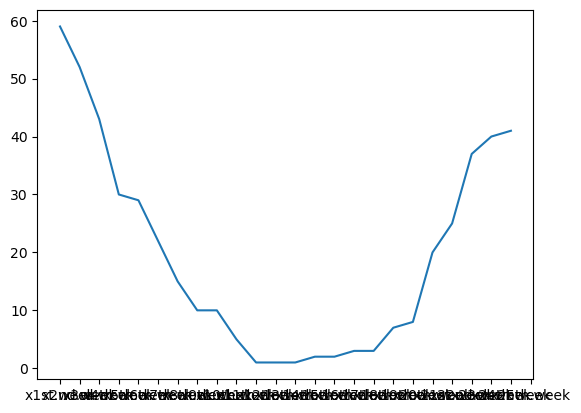

In [22]:
#quick plot of a songs performance from week1 to week76
pp.plot(billboard.loc[5,'x1st.week':'x76th.week'])

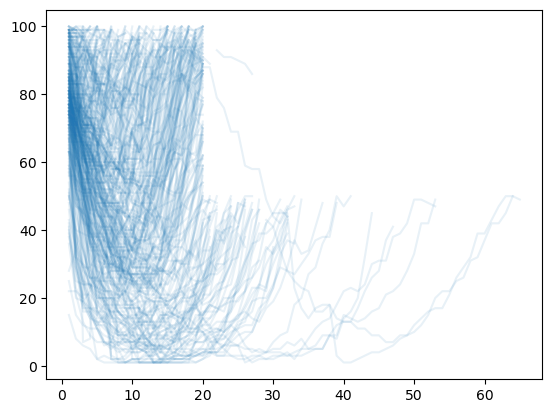

In [25]:
#same plot but overlap with performance of all the songs
for index, row in billboard.iterrows():
    pp.plot(range(1, 77), 
            row['x1st.week':'x76th.week'], 
            color = 'C0', 
            alpha = 0.1)

In [37]:
#clean and display using rankin
bshort = billboard[['artist.inverted', 'track', 'time', 'date.entered', 'x1st.week', 'x2nd.week', 'x3rd.week']]
bshort.head()

,artist.inverted,track,time,date.entered,x1st.week,x2nd.week,x3rd.week
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,78,63.0,49.0
1,Santana,"Maria, Maria",4:18,2000-02-12,15,8.0,6.0
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,71,48.0,43.0
3,Madonna,Music,3:45,2000-08-12,41,23.0,18.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,57,47.0,45.0


In [43]:
bshort.columns = ['artist', 'track', 'time', 'date.entered', 'wk1', 'wk2', 'wk3']
bshort.head()

,artist,track,time,date.entered,wk1,wk2,wk3
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,78,63.0,49.0
1,Santana,"Maria, Maria",4:18,2000-02-12,15,8.0,6.0
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,71,48.0,43.0
3,Madonna,Music,3:45,2000-08-12,41,23.0,18.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,57,47.0,45.0


In [45]:
#converting a portion of the columns from wide to long
bmelt = bshort.melt(['artist', 'track', 'time', 'date.entered'],['wk1', 'wk2', 'wk3'], 'week', 'rank')
bmelt

,artist,track,time,date.entered,week,rank
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,wk1,78.0
1,Santana,"Maria, Maria",4:18,2000-02-12,wk1,15.0
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,wk1,71.0
3,Madonna,Music,3:45,2000-08-12,wk1,41.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,wk1,57.0
...,...,...,...,...,...,...
946,Ghostface Killah,Cherchez LaGhost,3:04,2000-08-05,wk3,NaN
947,"Smith, Will",Freakin' It,3:58,2000-02-12,wk3,99.0
948,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk3,NaN
949,"Eastsidaz, The",Got Beef,3:58,2000-07-01,wk3,NaN


In [47]:
#display a row with a filter using query
bmelt.query('artist == "Madonna"')

,artist,track,time,date.entered,week,rank
3,Madonna,Music,3:45,2000-08-12,wk1,41.0
117,Madonna,American Pie,4:30,2000-02-19,wk1,43.0
320,Madonna,Music,3:45,2000-08-12,wk2,23.0
434,Madonna,American Pie,4:30,2000-02-19,wk2,35.0
637,Madonna,Music,3:45,2000-08-12,wk3,18.0
751,Madonna,American Pie,4:30,2000-02-19,wk3,29.0


In [79]:
#converting the 'week' into numbers. use apply, then it takes a function, this case lambda, s: takes top value which is 'week' column, get the 3rd character
bmelt['week'] = bmelt['week'].apply(lambda s: int(s[2]))

In [80]:
#convert dates into proper date-time data type
bmelt['date.entered'] = pd.to_datetime(bmelt['date.entered'])

In [62]:
bmelt.head()

,artist,track,time,date.entered,week,rank
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,wk1,78.0
1,Santana,"Maria, Maria",4:18,2000-02-12,wk1,15.0
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,wk1,71.0
3,Madonna,Music,3:45,2000-08-12,wk1,41.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,wk1,57.0


In [81]:
bmelt['date.entered'][0] + pd.Timedelta(' 7 days')

Timestamp('2000-09-30 00:00:00')

In [82]:
#try using some date calculations, try timedelta and add a new column 'date'
bmelt['date'] = bmelt['date.entered'] + pd.Timedelta('7 days') * (bmelt['week'] - 1)

In [ ]:
#drop the old date.entered column
bmelt.drop(['date.entered'],
           axis = 1,
           inplace = True)

In [86]:
bmelt

,artist,track,time,week,rank,date
0,Destiny's Child,Independent Women Part I,3:38,1,78.0,2000-09-23
1,Santana,"Maria, Maria",4:18,1,15.0,2000-02-12
2,Savage Garden,I Knew I Loved You,4:07,1,71.0,1999-10-23
3,Madonna,Music,3:45,1,41.0,2000-08-12
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,1,57.0,2000-08-05
...,...,...,...,...,...,...
946,Ghostface Killah,Cherchez LaGhost,3:04,3,NaN,2000-08-19
947,"Smith, Will",Freakin' It,3:58,3,99.0,2000-02-26
948,Zombie Nation,Kernkraft 400,3:30,3,NaN,2000-09-16
949,"Eastsidaz, The",Got Beef,3:58,3,NaN,2000-07-15


In [90]:
#rearrange the columns
bfinal = bmelt[['artist', 'track', 'time', 'date', 'week', 'rank']]
bfinal.sort_values(['artist', 'track'], inplace=True)

In [105]:
bfinal.head()

,artist,track,time,date,week,rank
246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-02-26,1,87.0
563,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-03-04,2,82.0
880,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-03-11,3,72.0
287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,2000-09-02,1,91.0
604,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,2000-09-09,2,87.0


In [98]:
#normalizing table, moving artis track and time to a separate table
tracks = bfinal[['artist', 'track', 'time']].drop_duplicates()

In [99]:
tracks

,artist,track,time
246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22
287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15
24,3 Doors Down,Kryptonite,3:53
193,3 Doors Down,Loser,4:24
69,504 Boyz,Wobble Wobble,3:35
...,...,...,...
254,Yankee Grey,Another Nine Minutes,3:10
277,"Yearwood, Trisha",Real Live Woman,3:55
251,Ying Yang Twins,Whistle While You Twurk,4:19
314,Zombie Nation,Kernkraft 400,3:30


In [100]:
#changing index name to 'id' and resetting the index to match the sorted values and save it to a new df tracks_id
tracks.index.name = 'id'
tracks_id = tracks.reset_index()
tracks_id.head()

,id,artist,track,time
0,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22
1,287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15
2,24,3 Doors Down,Kryptonite,3:53
3,193,3 Doors Down,Loser,4:24
4,69,504 Boyz,Wobble Wobble,3:35


In [102]:
#join table
pd.merge(tracks_id, bfinal, on=['track','artist','time'])

,id,artist,track,time,date,week,rank
0,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-02-26,1,87.0
1,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-03-04,2,82.0
2,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-03-11,3,72.0
3,287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,2000-09-02,1,91.0
4,287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,2000-09-09,2,87.0
...,...,...,...,...,...,...,...
946,314,Zombie Nation,Kernkraft 400,3:30,2000-09-09,2,99.0
947,314,Zombie Nation,Kernkraft 400,3:30,2000-09-16,3,NaN
948,15,matchbox twenty,Bent,4:12,2000-04-29,1,60.0
949,15,matchbox twenty,Bent,4:12,2000-05-06,2,37.0


In [103]:
#creating a new table for the rankings
rank_id = pd.merge(tracks_id, bfinal, on=['track','artist','time']).drop(['artist', 'track', 'time'], axis=1)
rank_id.head()

,id,date,week,rank
0,246,2000-02-26,1,87.0
1,246,2000-03-04,2,82.0
2,246,2000-03-11,3,72.0
3,287,2000-09-02,1,91.0
4,287,2000-09-09,2,87.0


In [108]:
#sorting the rank_id by rank, see the top ranking song by id
rank_id[rank_id.week == 1]['rank'].idxmin()

756

In [109]:
#index locator
rank_id.loc[rank_id[rank_id.week == 1]['rank'].idxmin()]

id                        1
date    2000-02-12 00:00:00
week                      1
rank                   15.0
Name: 756, dtype: object

In [110]:
#locate by id # on the tracks_id df
tracks_id.query('id == 1')

,id,artist,track,time
252,1,Santana,"Maria, Maria",4:18


# Challenge 1
Clean the dataframe, use pandas melt, and finally, normalize the tables

In [47]:
tb = pd.read_csv('py-statistics-refine\\Exercise Files\\chapter2\\02_05\\tb.csv')

In [48]:
tb

,country,year,m04,m514,m014,m1524,m2534,m3544,m4554,m5564,...,f04,f514,f014,f1524,f2534,f3544,f4554,f5564,f65,fu
0,AD,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AD,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AD,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AD,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5764,ZW,2004,NaN,NaN,187.0,833.0,2908.0,2298.0,1056.0,366.0,...,NaN,NaN,225.0,1140.0,2858.0,1565.0,622.0,214.0,111.0,NaN
5765,ZW,2005,NaN,NaN,210.0,837.0,2264.0,1855.0,762.0,295.0,...,NaN,NaN,269.0,1136.0,2242.0,1255.0,578.0,193.0,603.0,NaN
5766,ZW,2006,NaN,NaN,215.0,736.0,2391.0,1939.0,896.0,348.0,...,NaN,NaN,237.0,1020.0,2424.0,1355.0,632.0,230.0,96.0,NaN
5767,ZW,2007,6.0,132.0,138.0,500.0,3693.0,0.0,716.0,292.0,...,7.0,178.0,185.0,739.0,3311.0,0.0,553.0,213.0,90.0,NaN


In [49]:
tb.columns

Index(['country', 'year', 'm04', 'm514', 'm014', 'm1524', 'm2534', 'm3544',
       'm4554', 'm5564', 'm65', 'mu', 'f04', 'f514', 'f014', 'f1524', 'f2534',
       'f3544', 'f4554', 'f5564', 'f65', 'fu'],
      dtype='object')

In [112]:
#using melt to convert columns from wide to long, specific to columns containing the gender+age
tbmelt = tb.melt(['country', 'year'], ['m04', 'm514', 'm014', 'm1524', 'm2534', 'm3544',
       'm4554', 'm5564', 'm65', 'mu', 'f04', 'f514', 'f014', 'f1524', 'f2534',
       'f3544', 'f4554', 'f5564', 'f65', 'fu'], 'sex_age', 'cases')

In [113]:
#separating the gender+age values to their own colums sex and age
tbmelt['sex'] = tbmelt['sex_age'].str[0]
tbmelt['age'] = tbmelt['sex_age'].str.slice(1)

In [114]:
#transofrming the age column, since we have an age rage value, we will split it into min_age and max_age
def split_age_range(age_str):
    if age_str[-1] == 'u':  # Unspecified age
        return np.nan, np.nan
    elif len(age_str) == 3:  # Two-digit exact age
        return age_str[:1], age_str[1:]
    elif len(age_str) == 4:  # Two-digit age range
        return age_str[:2], age_str[2:]
    else:
        return age_str, age_str
    
tbmelt['min_age'], tbmelt['max_age'] = zip(*tbmelt['sex_age'].str[1:].apply(split_age_range))


In [115]:
#dropping na values
tbmelt = tbmelt.dropna(subset = ['cases', 'min_age', 'max_age'])

In [116]:
#dropping the sex_age and age columns since its redundant
tbmelt = tbmelt.drop(['sex_age'], axis=1)
tbmelt = tbmelt.drop(['age'], axis = 1)

In [118]:
#converting data type
tbmelt['min_age'] = tbmelt['min_age'].astype(int)
tbmelt['max_age'] = tbmelt['max_age'].astype(int)

In [119]:
#rearranging the columns
tbmelt = tbmelt[['country', 'year', 'min_age', 'max_age', 'sex', 'cases']]

In [120]:
tbmelt

,country,year,min_age,max_age,sex,cases
15,AD,2005,4,4,m,0.0
16,AD,2006,4,4,m,0.0
18,AD,2008,4,4,m,0.0
42,AE,2006,4,4,m,0.0
43,AE,2007,4,4,m,0.0
...,...,...,...,...,...,...
109606,ZW,2004,65,65,f,111.0
109607,ZW,2005,65,65,f,603.0
109608,ZW,2006,65,65,f,96.0
109609,ZW,2007,65,65,f,90.0


## Challenge complete 

Next, I will try to use ipywidgets

[ipywidgets](https://github.com/jupyter-widgets/ipywidgets#readme), also known as jupyter-widgets or simply widgets, are interactive HTML widgets for Jupyter notebooks and the IPython kernel.